In [1]:
import matplotlib.pyplot as plt
from utils import Metric
import numpy as np

In [2]:
float_tuple = (1.2345678, 2.3456789, 3.456789)
"(" + ", ".join(f"{x:.4f}" for x in float_tuple) + ")"

'(1.2346, 2.3457, 3.4568)'

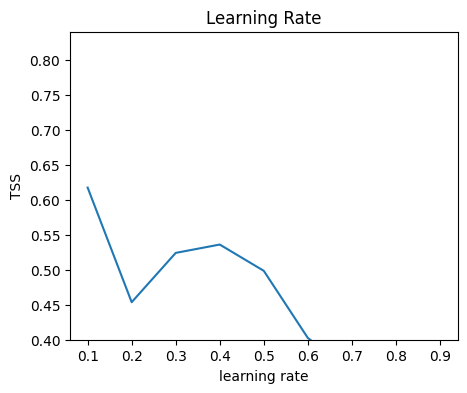

In [6]:
# data = np.load("./experiments_plot/train_True_cm_p_tuning.npy")
# d = [Metric(binary=True, cm=cm) for cm in data]
# 
# datashow = [m.tss for m in d]
# print(datashow)
# fig = plt.figure(figsize=(4, 3))
# ax = fig.add_axes([0, 0, 1, 1])
# x_ticks = [round(0.1 * i + 0.1, 2) for i in range(9)]
# ax.plot(datashow)
# ax.set_xticks(range(0, len(x_ticks)))
# ax.set_xticklabels(x_ticks)
# plt.ylabel("TSS")
# plt.xlabel("Validation fraction of data")
# plt.show()

data = np.load("./experiments_plot/train_True_cm_p_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = [round(0.1 * i + 0.1, 2) for i in range(9)]
plt.ylabel("TSS")
plt.xlabel("learning rate")
plt.plot(x_ticks, tss_view)
plt.ylim(bottom=0.40, top=0.84)
plt.title("Learning Rate")
plt.show()

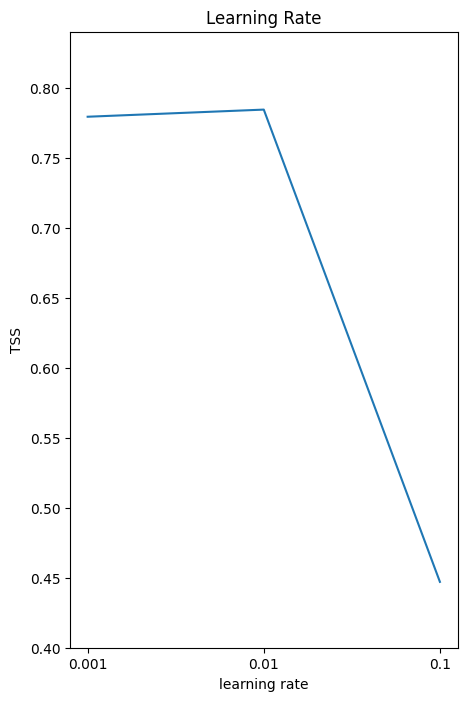

In [34]:
data = np.load("./experiments_plot/train_True_cm_lr_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 8))
x_ticks = ["0.001", "0.01", "0.1"]
plt.ylabel("TSS")
plt.xlabel("learning rate")
plt.plot(x_ticks, tss_view)
plt.ylim(bottom=0.40, top=0.84)
plt.title("Learning Rate")
plt.show()

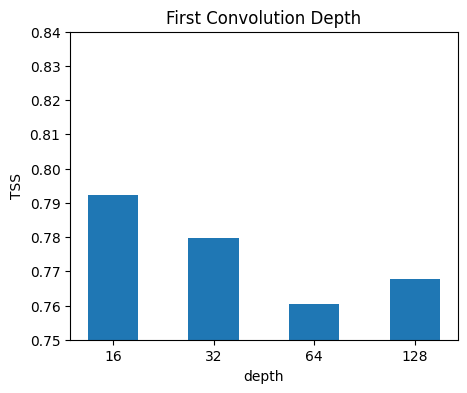

In [20]:
data = np.load("./experiments_plot/train_True_cm_depth1_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("depth")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("First Convolution Depth")
plt.show()

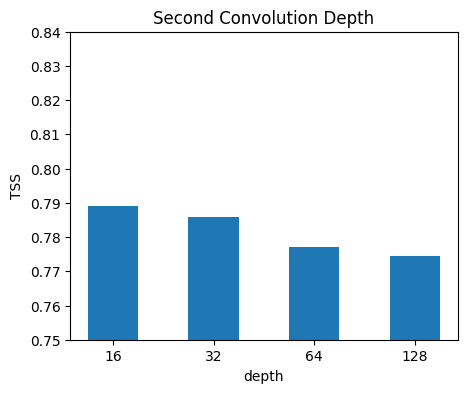

In [21]:
data = np.load("./experiments_plot/train_True_cm_depth2_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("depth")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("Second Convolution Depth")
plt.show()

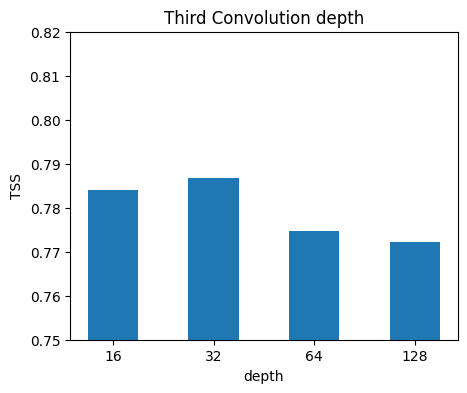

In [37]:
data = np.load("./experiments_plot/train_True_cm_depth3_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("depth")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("Third Convolution depth")
plt.show()

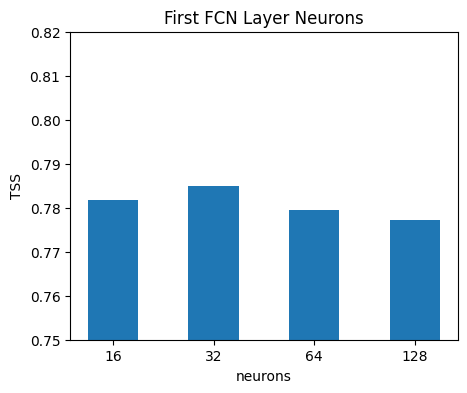

In [36]:
data = np.load("./experiments_plot/train_True_cm_lhidden1_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("neurons")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("First FCN Layer Neurons")
plt.show()

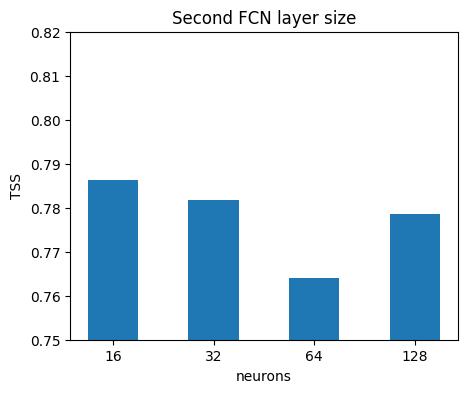

In [35]:
data = np.load("./experiments_plot/train_True_cm_lhidden2_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("neurons")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("Second FCN layer size")
plt.show()